In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split

##models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 

## Model evaluators
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
## Importing dataset
df_train = pd.read_csv("data/train.csv")

In [3]:
## Looking at the top 5 rows of the dataset
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Looking at the bottom 5 rows of the column
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
## Checking for  the number of rows and columns  in the dataset
print(f"Number of rows :{df_train.shape[0]} \nNumber of columns:{df_train.shape[1]}")

Number of rows :891 
Number of columns:12


In [6]:
df_train = df_train.drop(["Name", "Ticket", "Cabin"], axis=1)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [8]:
## CHecking the dtypes of the columns in the dataset
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [9]:
## Checking for any null values in the dataset
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
## Replacing age nan values with its mean
df_train["Age"]= df_train["Age"].fillna(df_train["Age"].mean())
df_train["Age"].isna().sum()

0

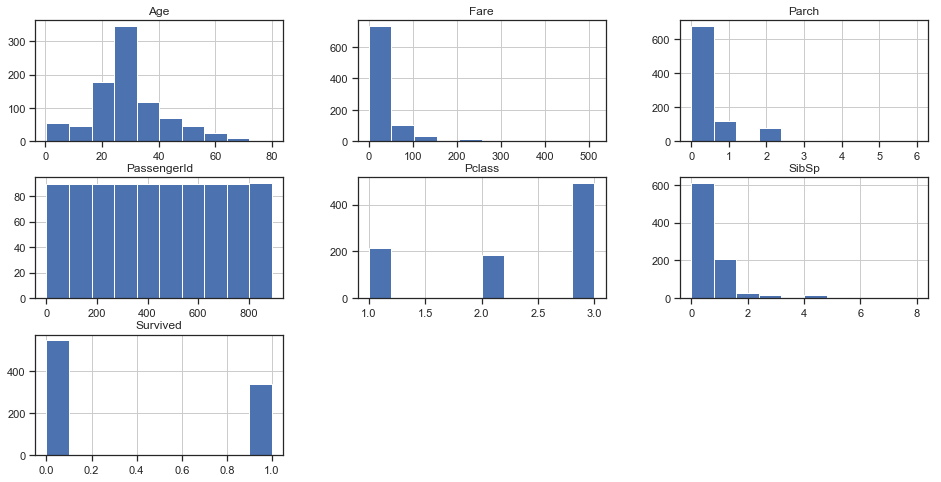

In [11]:
df_train.hist(figsize=(16,8));
plt.title("Dataset Distribution")
plt.show()

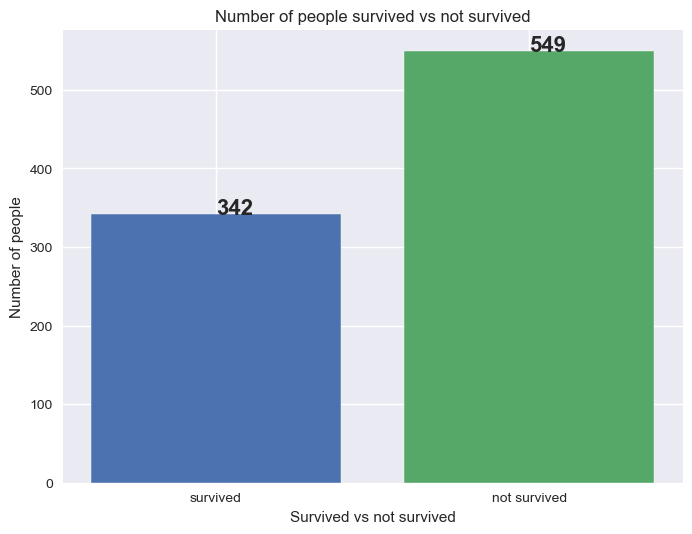

In [12]:
survived = df_train[df_train.Survived==1].count()[0]
not_survived = df_train[df_train.Survived==0].count()[0]
text = ["survived","not survived"]
label = [survived,not_survived]
plt.style.use('seaborn')
plt.figure(figsize=(8,6),dpi=100)
for bar in range(0,2):
    plt.bar(text[bar],label[bar])
    plt.text(text[bar],label[bar],str(label[bar]),fontsize=16, fontweight='bold')
plt.title("Number of people survived vs not survived")
plt.xlabel("Survived vs not survived")
plt.ylabel("Number of people")
plt.show()

In [13]:
df_train.Age = df_train.Age.astype(int)

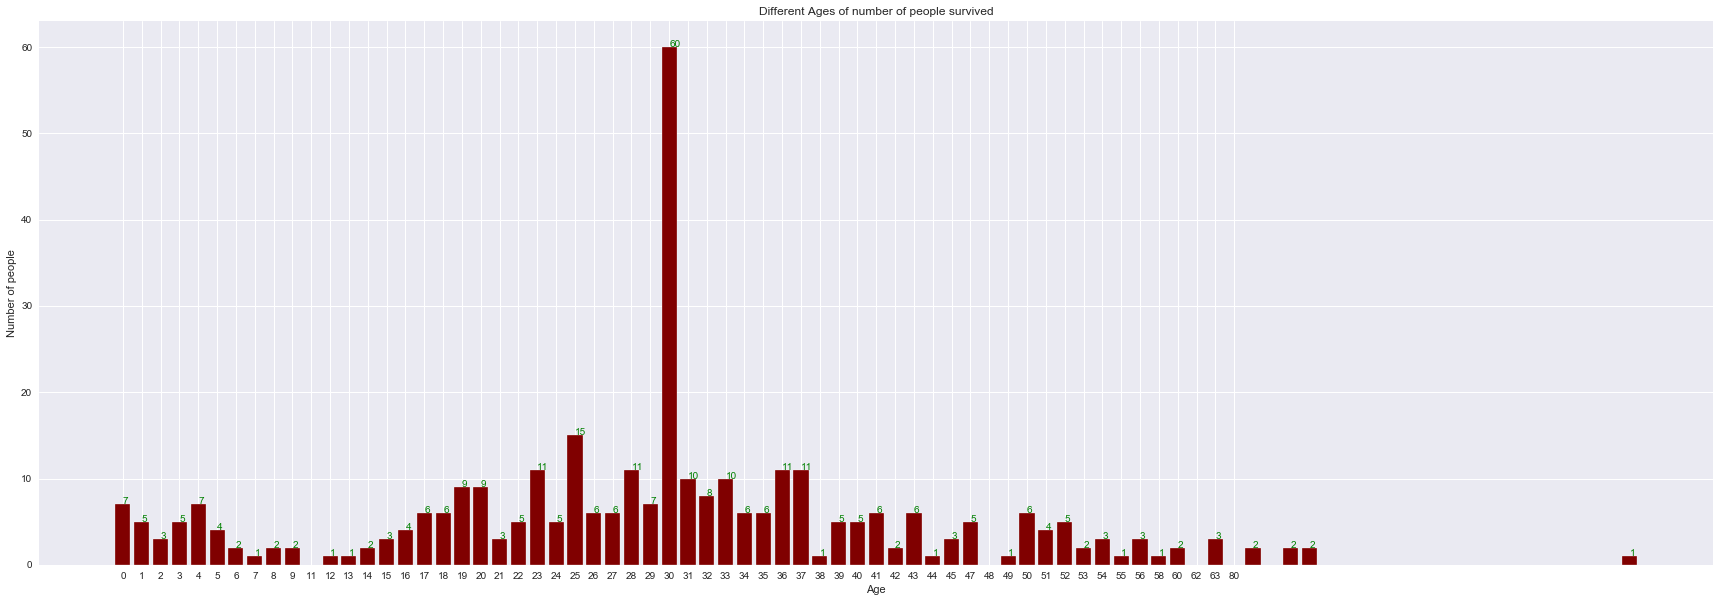

In [14]:
## Checking the survival rate according to age
ages = df_train[df_train.Survived==1]["Age"].sort_values()
dc =  {}
for age in ages:
    if age not in dc.keys():
        dc[age] = 1
    else:
        dc[age] +=1
plt.figure(figsize=(30,10))
key = list(dc.keys())
value = list(dc.values())
for index in range(len(key)):
    plt.bar(key[index],value[index],color ='maroon')
    plt.text(key[index],value[index],str(value[index]),color="green")
plt.xticks(np.arange(len(key)),key)
plt.title("Different Ages of number of people survived")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

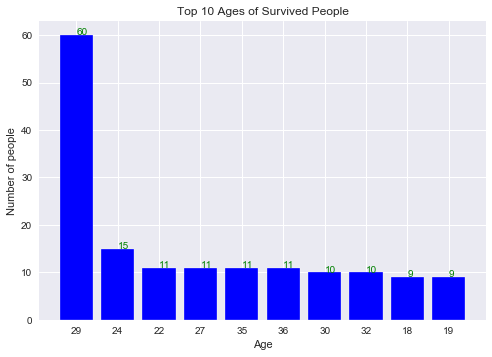

In [15]:
dc = {0: 7, 1: 5, 2: 3, 3: 5, 4: 7, 5: 4, 6: 2, 7: 1, 8: 2, 9: 2, 11: 1, 12: 1, 13: 2, 14: 3, 15: 4, 16: 6, 17: 6, 18: 9, 19: 9, 20: 3, 21: 5, 22: 11, 23: 5, 24: 15, 25: 6, 26: 6, 27: 11, 28: 7, 29: 60, 30: 10, 31: 8, 32: 10, 33: 6, 34: 6, 35: 11, 36: 11, 37: 1, 38: 5, 39: 5, 40: 6, 41: 2, 42: 6, 43: 1, 44: 3, 45: 5, 47: 1, 48: 6, 49: 4, 50: 5, 51: 2, 52: 3, 53: 1, 54: 3, 55: 1, 56: 2, 58: 3, 60: 2, 62: 2, 63: 2, 80: 1}
dc_sorted = sorted(dc.items(), key=lambda x: x[1], reverse=True)
key_10 = [dc_sorted[i][0] for i in range(len(dc_sorted))][:10]
value_10= [dc_sorted[i][1] for i in range(len(dc_sorted))][:10]
plt.bar(np.arange(len(key_10)),value_10, color ='blue')
for index in range(len(key_10)):
    plt.text(index,value_10[index],str(value_10[index]),color="green")
plt.xticks(np.arange(len(key_10)),key_10)
plt.title("Top 10 Ages of Survived People")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

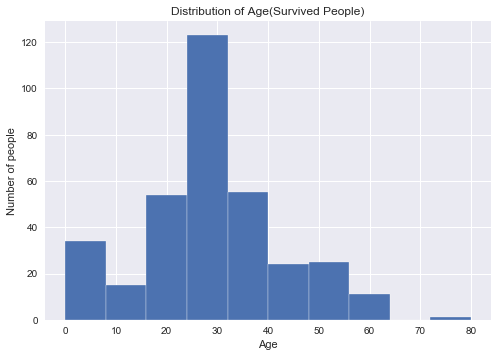

In [16]:
df_train[df_train.Survived==1]["Age"].hist()
plt.title("Distribution of Age(Survived People)")
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show()

In [17]:
## Replacing Sex "male":0 and "female":1
print(df_train.Sex[:5])
df_train["Sex"]= df_train["Sex"].replace({"female":0, "male":1})
df_train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

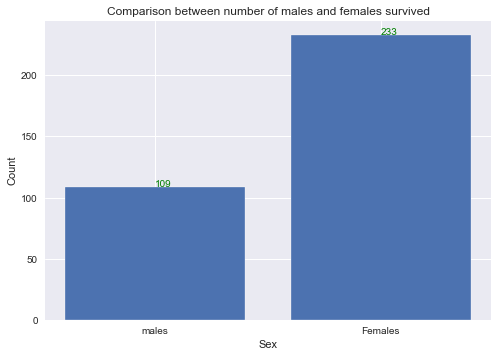

In [18]:
## Comparision between number of mails and feamals survivied
males = df_train[(df_train["Survived"]==1) & (df_train.Sex==1)]["Sex"].count()
female = df_train[(df_train["Survived"]==1) & (df_train.Sex==0)]["Sex"].count()
value = [males,female]
labels = ["males","Females"]
plt.bar(np.arange(len(value)),value);
for index in range(len(value)):
    plt.text(index,value[index],str(value[index]),color="green")
plt.xticks(np.arange(len(labels)),labels)
plt.title("Comparison between number of males and females survived")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.style.use("ggplot")
plt.show()

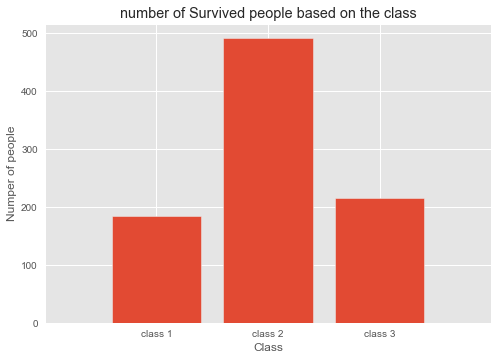

In [19]:
class_1 = df_train[df_train.Pclass==1].count()[0]
class_2 = df_train[df_train.Pclass==2].count()[0]
class_3 = df_train[df_train.Pclass==3].count()[0]
classs = [class_1,class_2,class_3]
plt.bar(df_train.Pclass.unique(),classs)
plt.xticks(np.arange(5),["","class 1","class 2","class 3",""])
plt.title("number of Survived people based on the class")
plt.xlabel("Class")
plt.ylabel("Numper of people")
plt.show()

In [20]:
df_train.dropna(inplace=True)

In [21]:
print(df_train.Embarked.unique())
df_train.Embarked = df_train.Embarked.replace({"S":0, "C":1,"Q":2})
df_train.Embarked.isnull().sum()
print(df_train.shape)

['S' 'C' 'Q']
(889, 9)


In [22]:
# Everything except target variable
print(df_train.iloc[:,2:-1].head())
X = df_train.iloc[:,2:-1].values

# Target variable
y = df_train.Survived.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

   Pclass  Sex  Age  SibSp  Parch     Fare
0       3    1   22      1      0   7.2500
1       1    0   38      1      0  71.2833
2       3    0   26      0      0   7.9250
3       1    0   35      1      0  53.1000
4       3    1   35      0      0   8.0500


In [23]:
X_train[:5]

array([[ 3.   ,  1.   , 17.   ,  0.   ,  0.   ,  7.125],
       [ 2.   ,  0.   , 18.   ,  0.   ,  1.   , 23.   ],
       [ 2.   ,  1.   , 31.   ,  1.   ,  1.   , 26.25 ],
       [ 3.   ,  0.   , 30.   ,  0.   ,  0.   , 12.475],
       [ 3.   ,  0.   , 10.   ,  0.   ,  2.   , 24.15 ]])

In [24]:
X_test[:5]

array([[  3.    ,   0.    ,  14.    ,   0.    ,   0.    ,   7.8542],
       [  3.    ,   1.    ,  29.    ,   8.    ,   2.    ,  69.55  ],
       [  1.    ,   0.    ,  36.    ,   1.    ,   2.    , 120.    ],
       [  1.    ,   1.    ,  36.    ,   1.    ,   0.    ,  78.85  ],
       [  3.    ,   0.    ,  63.    ,   0.    ,   0.    ,   9.5875]])

In [25]:

# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
         "SVM": SVC(),
         "Naive bayses":GaussianNB(),
         "Decision Tree":DecisionTreeClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train,y_train,X_test,y_test):
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                             y_test=y_test)
model_scores

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'KNN': 0.6868686868686869,
 'Logistic Regression': 0.7575757575757576,
 'Random Forest': 0.7878787878787878,
 'SVM': 0.6498316498316499,
 'Naive bayses': 0.7609427609427609,
 'Decision Tree': 0.7710437710437711}

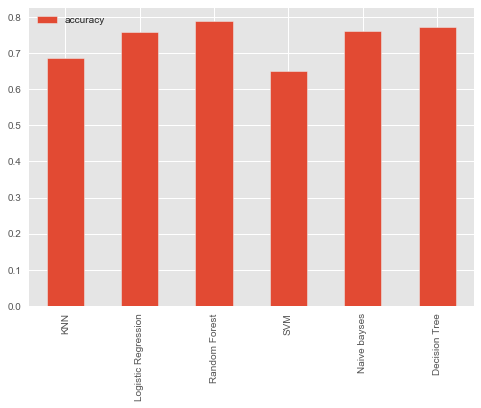

In [26]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

0.7912457912457912


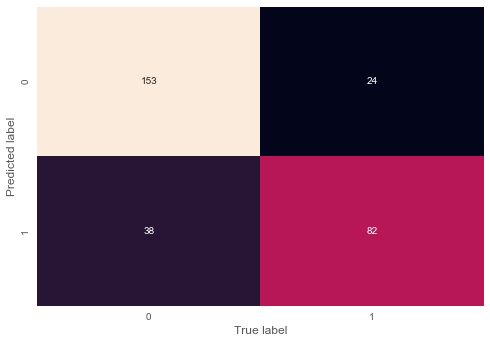

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost= GradientBoostingClassifier(n_estimators=300, random_state=0).fit(X_train, y_train)
preds= gradboost.predict(X_test)
sns.heatmap(confusion_matrix(y_test,preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");
print(gradboost.score(X_test,y_test))

In [43]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       177
           1       0.77      0.68      0.73       120

   micro avg       0.79      0.79      0.79       297
   macro avg       0.79      0.77      0.78       297
weighted avg       0.79      0.79      0.79       297



In [40]:
df_test = pd.read_csv("data/test.csv")
df_test = df_test.drop(["Name", "Ticket", "Cabin"], axis=1)
df_test["Sex"]= df_test["Sex"].replace({"female":0, "male":1})
df_test["Age"]= df_test["Age"].fillna(df_test["Age"].mean())
df_test.Age = df_test.Age.astype(int)
df_test.Embarked = df_test.Embarked.replace({"S":0, "C":1,"Q":2,"nan":3})
df_test["Fare"]= df_test["Fare"].fillna(df_test["Fare"].median())
test_x = df_test.iloc[:,1:-1].values
print(test_x)

[[ 3.      1.     34.      0.      0.      7.8292]
 [ 3.      0.     47.      1.      0.      7.    ]
 [ 2.      1.     62.      0.      0.      9.6875]
 ...
 [ 3.      1.     38.      0.      0.      7.25  ]
 [ 3.      1.     30.      0.      0.      8.05  ]
 [ 3.      1.     30.      1.      1.     22.3583]]


In [41]:
data = pd.read_csv("data/gender_submission.csv")
test_y = data["Survived"].values
test_y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [49]:
y_pred = gradboost.predict(test_x)
print(y_pred)
print(len(y_pred))
print(len(df_test["PassengerId"]))

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
418
418


In [44]:
preds_df= pd.DataFrame(df_te, columns=['PassengerId'])
preds_df['Survived']=y_pred
preds_df.head()

ValueError: Length of values does not match length of index

In [45]:
data = pd.read_csv("data/gender_submission.csv")
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
preds_df.shape

In [ ]:
preds_df.to_csv('data/Titanic_Submission.csv', index=False)